In [1]:
import pandas as pd 
import numpy as np
import math
import keras
import tensorflow as tf
import progressbar
import os
from os import listdir

## Print Dependencies



Dependences are fundamental to record the computational environment.

In [2]:
%load_ext watermark

# python, ipython, packages, and machine characteristics
%watermark -v -m -p pandas,keras,numpy,math,tensorflow,matplotlib,h5py

# date
print (" ")
%watermark -u -n -t -z

Python implementation: CPython
Python version       : 3.8.8
IPython version      : 7.22.0

pandas    : 1.2.3
keras     : 2.4.3
numpy     : 1.19.5
math      : unknown
tensorflow: 2.4.1
matplotlib: 3.4.0
h5py      : 2.10.0

Compiler    : Clang 12.0.0 (clang-1200.0.32.29)
OS          : Darwin
Release     : 19.6.0
Machine     : x86_64
Processor   : i386
CPU cores   : 8
Architecture: 64bit

 
Last updated: Thu Apr 01 2021 12:14:09CEST



## Load of the data

   You can also load all of them! Writing "all_data"

In [3]:
from process import loaddata
class_data0 = loaddata("../{}".format('data'))

In [4]:
class_data0 = class_data0[class_data0[:,0] > 0.0001]

In [5]:
data = []
i = 0
saved = []
for class_ in class_data0:
    #print(class_[0])
    if class_[0] < 0.002: 
        if i == 50:
            i = 0
            data.append(class_) 
        else:
            i = i + 1
    if class_[0] > 0.003:
        data.append(class_) 
        data.append(class_) 
        data.append(class_) 
        data.append(class_) 
        data.append(class_) 
        data.append(class_) 
        data.append(class_) 
        data.append(class_) 
        data.append(class_) 
        data.append(class_) 
    if class_[0] > 0.005:
        data.append(class_) 
        data.append(class_) 
        data.append(class_) 
        data.append(class_) 
        data.append(class_) 
        data.append(class_) 
        data.append(class_) 
        data.append(class_) 
        data.append(class_) 
        data.append(class_) 
        data.append(class_) 
        data.append(class_) 
        data.append(class_) 
        data.append(class_) 
        data.append(class_) 
        data.append(class_) 
        data.append(class_) 
        data.append(class_) 
        data.append(class_) 
        data.append(class_) 
    if class_[0] > 0.007:
        data.append(class_) 
        data.append(class_) 
        data.append(class_) 
        data.append(class_) 
        data.append(class_) 
        data.append(class_) 
        data.append(class_) 
        data.append(class_) 
        data.append(class_) 
        data.append(class_) 
        data.append(class_) 
        data.append(class_) 
        data.append(class_) 
        data.append(class_) 
        data.append(class_) 
        data.append(class_) 
        data.append(class_) 
        data.append(class_) 
        data.append(class_) 
        data.append(class_) 
    else: 
        data.append(class_) 

In [6]:
len(data)
class_data = []
class_data = np.array(data)

In [7]:
class_data.shape

(5226473, 14)

In [8]:
class_data0.shape

(5043695, 14)

In [9]:
np.random.shuffle(class_data)
y = class_data[:,0]
A = class_data
print(A[0])
A[:,9] = A[:,13]
print(A[0])
x = class_data[:,1:10]
print(x[0])
print(x.shape)

[ 4.00278620e-04  3.75950300e+01 -5.09397838e+01 -2.63735092e+01
 -6.32170230e+01  4.66763230e+00 -1.24102195e+01  5.07500000e-01
  8.67500000e+08  2.21961043e-02  4.87444042e-01  3.70426067e-01
 -3.46101673e-01  6.48537360e-04]
[ 4.00278620e-04  3.75950300e+01 -5.09397838e+01 -2.63735092e+01
 -6.32170230e+01  4.66763230e+00 -1.24102195e+01  5.07500000e-01
  8.67500000e+08  6.48537360e-04  4.87444042e-01  3.70426067e-01
 -3.46101673e-01  6.48537360e-04]
[ 3.75950300e+01 -5.09397838e+01 -2.63735092e+01 -6.32170230e+01
  4.66763230e+00 -1.24102195e+01  5.07500000e-01  8.67500000e+08
  6.48537360e-04]
(5226473, 9)


In [10]:
prova = [0,1,2,3,4,5,6,7,8,9,10,11,12,13]
a = prova
a[9] = a[13]
print(a)
#I want to remove [9,10,11,12] that are the positions
b = prova[11:14]
print(b)

[0, 1, 2, 3, 4, 5, 6, 7, 8, 13, 10, 11, 12, 13]
[11, 12, 13]


In [11]:
train_split = 0.75
train_limit = int(len(y)*train_split)
print("Training sample: {0} \nValuation sample: {1}".format(train_limit, len(y)-train_limit))

Training sample: 3919854 
Valuation sample: 1306619


In [12]:
x_train = x[:train_limit]
x_val = x[train_limit:]

y_train = y[:train_limit]
y_val = y[train_limit:]

## Model Build

In [13]:
from keras.models import Sequential
from keras.layers.core import Dense
import keras.backend as K
from keras import optimizers
from keras import models
from keras import layers
from keras.layers.normalization import BatchNormalization

In [14]:
from tensorflow.keras import backend as K

def root_mean_squared_log_error(y, y_pred):
    return K.sqrt(K.mean(K.square(K.log(1+y_pred) - K.log(1+y))))

def maape(y, y_pred):
    return K.mean(K.mean(K.atan(K.abs((y-ypred)/y))))

In [15]:
model_class = keras.models.load_model('../models/classifier/probability_noposition.h5')

In [16]:
model_class.summary()

Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
batch_normalization_6 (Batch (None, 9)                 36        
_________________________________________________________________
dense_54 (Dense)             (None, 18)                180       
_________________________________________________________________
dense_55 (Dense)             (None, 36)                684       
_________________________________________________________________
dense_56 (Dense)             (None, 72)                2664      
_________________________________________________________________
dense_57 (Dense)             (None, 144)               10512     
_________________________________________________________________
dense_58 (Dense)             (None, 72)                10440     
_________________________________________________________________
dense_59 (Dense)             (None, 36)               

In [17]:
history_cl = model_class.fit ( x_train, y_train, epochs = 500, batch_size = 100000, validation_data = (x_val, y_val) )

Epoch 1/500
40/40 [==============================] - 9s 217ms/step - loss: 0.0014 - mape: 335.2753 - val_loss: 4.3630e-04 - val_mape: 99.9978
Epoch 2/500
40/40 [==============================] - 8s 202ms/step - loss: 4.3478e-04 - mape: 99.9560 - val_loss: 4.3507e-04 - val_mape: 99.9794
Epoch 3/500
40/40 [==============================] - 8s 205ms/step - loss: 4.2618e-04 - mape: 99.7888 - val_loss: 4.2949e-04 - val_mape: 99.8818
Epoch 4/500
40/40 [==============================] - 8s 211ms/step - loss: 4.2295e-04 - mape: 99.6918 - val_loss: 4.2314e-04 - val_mape: 99.7100
Epoch 5/500
40/40 [==============================] - 8s 209ms/step - loss: 4.1125e-04 - mape: 98.4754 - val_loss: 3.9371e-04 - val_mape: 95.6676
Epoch 6/500
40/40 [==============================] - 8s 208ms/step - loss: 3.4367e-04 - mape: 82.8764 - val_loss: 3.0812e-04 - val_mape: 71.2207
Epoch 7/500
40/40 [==============================] - 8s 209ms/step - loss: 2.6965e-04 - mape: 63.1188 - val_loss: 2.3446e-04 - val_ma

40/40 [==============================] - 8s 199ms/step - loss: 1.4051e-04 - mape: 26.8827 - val_loss: 1.4179e-04 - val_mape: 29.5356
Epoch 58/500
40/40 [==============================] - 8s 201ms/step - loss: 1.4049e-04 - mape: 26.9232 - val_loss: 1.4038e-04 - val_mape: 25.6016
Epoch 59/500
40/40 [==============================] - 8s 200ms/step - loss: 1.4130e-04 - mape: 27.1748 - val_loss: 1.4410e-04 - val_mape: 25.5249
Epoch 60/500
40/40 [==============================] - 8s 200ms/step - loss: 1.4003e-04 - mape: 26.7905 - val_loss: 1.3867e-04 - val_mape: 27.0999
Epoch 61/500
40/40 [==============================] - 8s 206ms/step - loss: 1.3959e-04 - mape: 26.7458 - val_loss: 1.3937e-04 - val_mape: 25.5084
Epoch 62/500
40/40 [==============================] - 8s 206ms/step - loss: 1.3920e-04 - mape: 26.6723 - val_loss: 1.3860e-04 - val_mape: 27.6265
Epoch 63/500
40/40 [==============================] - 8s 212ms/step - loss: 1.3955e-04 - mape: 26.8449 - val_loss: 1.3822e-04 - val_mape:

40/40 [==============================] - 8s 196ms/step - loss: 1.2674e-04 - mape: 24.8976 - val_loss: 1.2895e-04 - val_mape: 28.0386
Epoch 114/500
40/40 [==============================] - 8s 198ms/step - loss: 1.2709e-04 - mape: 25.0547 - val_loss: 1.2803e-04 - val_mape: 23.5913
Epoch 115/500
40/40 [==============================] - 8s 195ms/step - loss: 1.2666e-04 - mape: 24.9251 - val_loss: 1.2510e-04 - val_mape: 25.6291
Epoch 116/500
40/40 [==============================] - 8s 195ms/step - loss: 1.2674e-04 - mape: 25.0244 - val_loss: 1.2466e-04 - val_mape: 23.6741
Epoch 117/500
40/40 [==============================] - 8s 197ms/step - loss: 1.2646e-04 - mape: 24.9866 - val_loss: 1.2939e-04 - val_mape: 28.6591
Epoch 118/500
40/40 [==============================] - 8s 197ms/step - loss: 1.2593e-04 - mape: 24.9053 - val_loss: 1.2531e-04 - val_mape: 23.3951
Epoch 119/500
40/40 [==============================] - 8s 196ms/step - loss: 1.2548e-04 - mape: 24.7580 - val_loss: 1.2510e-04 - val

Epoch 169/500
40/40 [==============================] - 9s 218ms/step - loss: 1.0534e-04 - mape: 21.5700 - val_loss: 1.0229e-04 - val_mape: 21.5681
Epoch 170/500
40/40 [==============================] - 8s 211ms/step - loss: 1.0460e-04 - mape: 21.3867 - val_loss: 1.0977e-04 - val_mape: 20.9807
Epoch 171/500
40/40 [==============================] - 8s 211ms/step - loss: 1.0478e-04 - mape: 21.4717 - val_loss: 1.0063e-04 - val_mape: 20.1755
Epoch 172/500
40/40 [==============================] - 8s 207ms/step - loss: 1.0436e-04 - mape: 21.4060 - val_loss: 1.0015e-04 - val_mape: 20.1777
Epoch 173/500
40/40 [==============================] - 8s 204ms/step - loss: 1.0332e-04 - mape: 21.1611 - val_loss: 1.0090e-04 - val_mape: 19.7789
Epoch 174/500
40/40 [==============================] - 8s 205ms/step - loss: 1.0202e-04 - mape: 20.8497 - val_loss: 1.0484e-04 - val_mape: 20.1823
Epoch 175/500
40/40 [==============================] - 8s 200ms/step - loss: 1.0261e-04 - mape: 21.0807 - val_loss: 9.

Epoch 225/500
40/40 [==============================] - 7s 187ms/step - loss: 7.8293e-05 - mape: 17.2107 - val_loss: 7.7226e-05 - val_mape: 18.0042
Epoch 226/500
40/40 [==============================] - 7s 186ms/step - loss: 7.9049e-05 - mape: 17.4713 - val_loss: 7.5233e-05 - val_mape: 17.2199
Epoch 227/500
40/40 [==============================] - 7s 184ms/step - loss: 7.5720e-05 - mape: 16.5871 - val_loss: 7.5695e-05 - val_mape: 15.8251
Epoch 228/500
40/40 [==============================] - 7s 184ms/step - loss: 7.5637e-05 - mape: 16.6081 - val_loss: 7.5853e-05 - val_mape: 17.6884
Epoch 229/500
40/40 [==============================] - 7s 186ms/step - loss: 7.4928e-05 - mape: 16.4506 - val_loss: 7.4984e-05 - val_mape: 15.8457
Epoch 230/500
40/40 [==============================] - 7s 185ms/step - loss: 7.5783e-05 - mape: 16.7008 - val_loss: 7.2815e-05 - val_mape: 16.4997
Epoch 231/500
40/40 [==============================] - 7s 186ms/step - loss: 7.4305e-05 - mape: 16.3367 - val_loss: 8.

Epoch 281/500
40/40 [==============================] - 8s 199ms/step - loss: 6.2692e-05 - mape: 14.4429 - val_loss: 5.8882e-05 - val_mape: 13.5615
Epoch 282/500
40/40 [==============================] - 8s 201ms/step - loss: 5.9846e-05 - mape: 13.7114 - val_loss: 5.8562e-05 - val_mape: 13.0054
Epoch 283/500
40/40 [==============================] - 8s 201ms/step - loss: 6.1024e-05 - mape: 14.0383 - val_loss: 5.8158e-05 - val_mape: 13.0132
Epoch 284/500
40/40 [==============================] - 8s 199ms/step - loss: 6.0445e-05 - mape: 13.9154 - val_loss: 6.0586e-05 - val_mape: 13.2169
Epoch 285/500
40/40 [==============================] - 8s 199ms/step - loss: 5.9727e-05 - mape: 13.6989 - val_loss: 5.7370e-05 - val_mape: 13.3477
Epoch 286/500
40/40 [==============================] - 8s 201ms/step - loss: 6.0590e-05 - mape: 13.8814 - val_loss: 6.2026e-05 - val_mape: 13.3793
Epoch 287/500
40/40 [==============================] - 8s 199ms/step - loss: 5.8662e-05 - mape: 13.4737 - val_loss: 5.

Epoch 337/500
40/40 [==============================] - 10s 240ms/step - loss: 5.0060e-05 - mape: 11.7375 - val_loss: 4.0707e-05 - val_mape: 9.2315
Epoch 338/500
40/40 [==============================] - 8s 197ms/step - loss: 4.8392e-05 - mape: 11.3854 - val_loss: 5.3599e-05 - val_mape: 13.6884
Epoch 339/500
40/40 [==============================] - 8s 196ms/step - loss: 4.8993e-05 - mape: 11.5164 - val_loss: 4.5465e-05 - val_mape: 10.3980
Epoch 340/500
40/40 [==============================] - 8s 192ms/step - loss: 4.6797e-05 - mape: 10.8744 - val_loss: 4.1390e-05 - val_mape: 9.5577
Epoch 341/500
40/40 [==============================] - 8s 189ms/step - loss: 4.0372e-05 - mape: 9.3786 - val_loss: 3.9957e-05 - val_mape: 9.4183
Epoch 342/500
40/40 [==============================] - 7s 187ms/step - loss: 4.0201e-05 - mape: 9.3719 - val_loss: 3.9668e-05 - val_mape: 9.0213
Epoch 343/500
40/40 [==============================] - 14s 358ms/step - loss: 3.9457e-05 - mape: 9.2283 - val_loss: 3.9144e

40/40 [==============================] - 15s 387ms/step - loss: 3.6857e-05 - mape: 8.8051 - val_loss: 3.4570e-05 - val_mape: 8.5939
Epoch 394/500
40/40 [==============================] - 17s 443ms/step - loss: 3.7262e-05 - mape: 8.9160 - val_loss: 3.3973e-05 - val_mape: 7.8837
Epoch 395/500
40/40 [==============================] - 8s 197ms/step - loss: 3.5031e-05 - mape: 8.4133 - val_loss: 3.8392e-05 - val_mape: 9.8311
Epoch 396/500
40/40 [==============================] - 8s 202ms/step - loss: 3.5769e-05 - mape: 8.6441 - val_loss: 3.6545e-05 - val_mape: 8.6275
Epoch 397/500
40/40 [==============================] - 8s 206ms/step - loss: 3.6290e-05 - mape: 8.7309 - val_loss: 3.5506e-05 - val_mape: 8.8727
Epoch 398/500
40/40 [==============================] - 8s 204ms/step - loss: 3.5905e-05 - mape: 8.6272 - val_loss: 3.6064e-05 - val_mape: 8.4666
Epoch 399/500
40/40 [==============================] - 9s 237ms/step - loss: 3.6309e-05 - mape: 8.6874 - val_loss: 3.8423e-05 - val_mape: 9.42

40/40 [==============================] - 8s 200ms/step - loss: 3.1446e-05 - mape: 7.5986 - val_loss: 3.2609e-05 - val_mape: 8.1790
Epoch 450/500
40/40 [==============================] - 8s 205ms/step - loss: 3.3200e-05 - mape: 7.9798 - val_loss: 4.0376e-05 - val_mape: 7.9430
Epoch 451/500
40/40 [==============================] - 8s 203ms/step - loss: 6.3166e-05 - mape: 14.9365 - val_loss: 7.9082e-05 - val_mape: 17.8353
Epoch 452/500
40/40 [==============================] - 25s 636ms/step - loss: 5.5128e-05 - mape: 12.5471 - val_loss: 6.2243e-05 - val_mape: 14.8691
Epoch 453/500
40/40 [==============================] - 8s 195ms/step - loss: 5.2689e-05 - mape: 12.4318 - val_loss: 5.5333e-05 - val_mape: 13.0322
Epoch 454/500
40/40 [==============================] - 8s 202ms/step - loss: 5.0464e-05 - mape: 11.7742 - val_loss: 5.7852e-05 - val_mape: 13.7086
Epoch 455/500
40/40 [==============================] - 8s 204ms/step - loss: 4.8231e-05 - mape: 11.3890 - val_loss: 5.0189e-05 - val_ma

In [18]:
model_class.save("../models/classifier/{}_highenergy.h5".format('probability'))

In [19]:
model_class = keras.models.load_model('../models/classifier/probability_highenergy.h5')

<ipython-input-20-44b2707ff4a7>:29: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


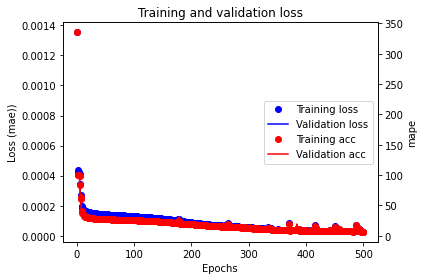

In [20]:
import matplotlib.pyplot as plt

loss = history_cl.history['loss']
val_loss = history_cl.history['val_loss']

accuracy = history_cl.history['mape']
val_accuracy = history_cl.history['val_mape']


epochs = range(1, len(loss) + 1)
fig, ax1 = plt.subplots()

l1 = ax1.plot(epochs, loss, 'bo', label='Training loss')
vl1 = ax1.plot(epochs, val_loss, 'b', label='Validation loss')
ax1.set_title('Training and validation loss')
ax1.set_xlabel('Epochs')
ax1.set_ylabel('Loss (mae))')

ax2 = ax1.twinx()
ac2= ax2.plot(epochs, accuracy, 'o', c="red", label='Training acc')
vac2= ax2.plot(epochs, val_accuracy, 'r', label='Validation acc')
ax2.set_ylabel('mape')

lns = l1 + vl1 + ac2 + vac2
labs = [l.get_label() for l in lns]
ax2.legend(lns, labs, loc="center right")
fig.tight_layout()
#fig.savefig("acc+loss_drop.pdf")
fig.show()

## Probability density distribution

In [21]:
y0 = class_data0[:,0]
A0 = class_data0
A0[:,9] = A0[:,13]
x0 = class_data0[:,1:10]

In [22]:
y0

array([0.0003886 , 0.00061458, 0.00023437, ..., 0.00013543, 0.0001896 ,
       0.00019928])

In [23]:
y_pred = model_class.predict(x0)

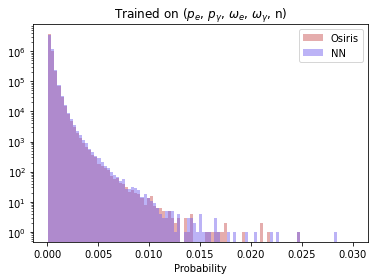

In [27]:
from matplotlib import pyplot
y = np.array(y)
bins = np.linspace(0.0001, 0.03, 100)
pyplot.hist(y0, bins, color = 'indianred', alpha=0.5, label='Osiris')
pyplot.hist(y_pred, bins, color = 'mediumslateblue', alpha=0.5, label='NN')
pyplot.yscale('log')
pyplot.legend(loc='upper right')
pyplot.xlabel('Probability')
pyplot.title('Trained on ($p_e$, $p_{\gamma}$, $\omega_e$, $\omega_{\gamma}$, n)')
pyplot.show()